<a href="https://colab.research.google.com/github/kommalina/House_Prices/blob/main/notebooks/%D0%90%D0%9F%D0%9E%D0%A0%D0%A1_%E2%84%961_House_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
house_df = pd.read_csv("/content/sample_data/train.csv", sep = ',')
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [ ]:
data = house_df.drop(columns=['SalePrice'])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data = data.drop(columns=['Alley'])
data = data.drop(columns=['MasVnrType'])
data = data.drop(columns=['PoolQC'])
data = data.drop(columns=['Fence'])
data = data.drop(columns=['MiscFeature'])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


In [ ]:
num_col = data.select_dtypes(include=['number']).columns
non_num_col = data.select_dtypes(exclude=['number']).columns

new = list(non_num_col) + list(num_col)

data = data[new]
data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   Street         1460 non-null   object 
 2   LotShape       1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  RoofStyle      1460 non-null   object 
 13  RoofMatl       1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

In [ ]:
subdata = data.iloc[:, :38]
subdata

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
encoder = LabelEncoder()
subdata_encoded = subdata.apply(encoder.fit_transform)
subdata_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,3,4,2,2,3,3,5,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,4,1,2,3,3,0,4,1,4,1,4,3,2,4,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,0,2,4,3,1,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,3,4,1,3,3,2,2,4,1,2,1,0,2,6,5,1,2,4,4,2,8,4


In [ ]:
subdata2 = data.iloc[:,38:75]
subdata2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


In [ ]:
zero_count = (subdata2 == 0).sum()
zero_count

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,861
BsmtFinSF1,467


In [ ]:
subdata2 = subdata2.drop(columns=['MasVnrArea'])
subdata2 = subdata2.drop(columns=['BsmtFinSF2'])
subdata2 = subdata2.drop(columns=['2ndFlrSF'])
subdata2 = subdata2.drop(columns=['LowQualFinSF'])
subdata2 = subdata2.drop(columns=['HalfBath'])
subdata2 = subdata2.drop(columns=['EnclosedPorch'])
subdata2 = subdata2.drop(columns=['3SsnPorch'])
subdata2 = subdata2.drop(columns=['ScreenPorch'])
subdata2 = subdata2.drop(columns=['PoolArea'])
subdata2 = subdata2.drop(columns=['MiscVal'])

subdata2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,706,150,856,856,1710,1,0,2,3,1,8,0,2003.0,2,548,0,61,2,2008
1,2,20,80.0,9600,6,8,1976,1976,978,284,1262,1262,1262,0,1,2,3,1,6,1,1976.0,2,460,298,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,486,434,920,920,1786,1,0,2,3,1,6,1,2001.0,2,608,0,42,9,2008
3,4,70,60.0,9550,7,5,1915,1970,216,540,756,961,1717,1,0,1,3,1,7,1,1998.0,3,642,0,35,2,2006
4,5,60,84.0,14260,8,5,2000,2000,655,490,1145,1145,2198,1,0,2,4,1,9,1,2000.0,3,836,192,84,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0,953,953,953,1647,0,0,2,3,1,7,1,1999.0,2,460,0,40,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,790,589,1542,2073,2073,1,0,2,3,1,7,2,1978.0,2,500,349,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,275,877,1152,1188,2340,0,0,2,4,1,9,2,1941.0,1,252,0,60,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,49,0,1078,1078,1078,1,0,1,2,1,5,0,1950.0,1,240,366,0,4,2010


In [ ]:
zero_count = (subdata2 == 0).sum()
zero_count

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
BsmtFinSF1,467
BsmtUnfSF,118


In [ ]:
subdata_encoded.reset_index(drop=True, inplace=True)
subdata2.reset_index(drop=True, inplace=True)

In [ ]:
data2 = pd.concat([subdata_encoded, subdata2], axis = 1)
data2

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,8,4,1,60,65.0,8450,7,5,2003,2003,706,150,856,856,1710,1,0,2,3,1,8,0,2003.0,2,548,0,61,2,2008
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4,2,20,80.0,9600,6,8,1976,1976,978,284,1262,1262,1262,0,1,2,3,1,6,1,1976.0,2,460,298,0,5,2007
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4,3,60,68.0,11250,7,5,2001,2002,486,434,920,920,1786,1,0,2,3,1,6,1,2001.0,2,608,0,42,9,2008
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0,4,70,60.0,9550,7,5,1915,1970,216,540,756,961,1717,1,0,1,3,1,7,1,1998.0,3,642,0,35,2,2006
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4,5,60,84.0,14260,8,5,2000,2000,655,490,1145,1145,2198,1,0,2,4,1,9,1,2000.0,3,836,192,84,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,3,4,2,2,3,3,5,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4,1456,60,62.0,7917,6,5,1999,2000,0,953,953,953,1647,0,0,2,3,1,7,1,1999.0,2,460,0,40,8,2007
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,4,1,2,3,3,0,4,1,4,1,4,3,2,4,1,2,4,4,2,8,4,1457,20,85.0,13175,6,6,1978,1988,790,589,1542,2073,2073,1,0,2,3,1,7,2,1978.0,2,500,349,0,2,2010
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,0,2,4,3,1,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4,1458,70,66.0,9042,7,9,1941,2006,275,877,1152,1188,2340,0,0,2,4,1,9,2,1941.0,1,252,0,60,5,2010
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,3,4,1,3,3,2,2,4,1,2,1,0,2,6,5,1,2,4,4,2,8,4,1459,20,68.0,9717,5,6,1950,1996,49,0,1078,1078,1078,1,0,1,2,1,5,0,1950.0,1,240,366,0,4,2010


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   int64  
 1   Street         1460 non-null   int64  
 2   LotShape       1460 non-null   int64  
 3   LandContour    1460 non-null   int64  
 4   Utilities      1460 non-null   int64  
 5   LotConfig      1460 non-null   int64  
 6   LandSlope      1460 non-null   int64  
 7   Neighborhood   1460 non-null   int64  
 8   Condition1     1460 non-null   int64  
 9   Condition2     1460 non-null   int64  
 10  BldgType       1460 non-null   int64  
 11  HouseStyle     1460 non-null   int64  
 12  RoofStyle      1460 non-null   int64  
 13  RoofMatl       1460 non-null   int64  
 14  Exterior1st    1460 non-null   int64  
 15  Exterior2nd    1460 non-null   int64  
 16  ExterQual      1460 non-null   int64  
 17  ExterCond      1460 non-null   int64  
 18  Foundati

In [ ]:
data2.fillna(data2.mean(), inplace=True)
data2

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,8,4,1,60,65.0,8450,7,5,2003,2003,706,150,856,856,1710,1,0,2,3,1,8,0,2003.0,2,548,0,61,2,2008
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4,2,20,80.0,9600,6,8,1976,1976,978,284,1262,1262,1262,0,1,2,3,1,6,1,1976.0,2,460,298,0,5,2007
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4,3,60,68.0,11250,7,5,2001,2002,486,434,920,920,1786,1,0,2,3,1,6,1,2001.0,2,608,0,42,9,2008
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0,4,70,60.0,9550,7,5,1915,1970,216,540,756,961,1717,1,0,1,3,1,7,1,1998.0,3,642,0,35,2,2006
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4,5,60,84.0,14260,8,5,2000,2000,655,490,1145,1145,2198,1,0,2,4,1,9,1,2000.0,3,836,192,84,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,3,4,2,2,3,3,5,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4,1456,60,62.0,7917,6,5,1999,2000,0,953,953,953,1647,0,0,2,3,1,7,1,1999.0,2,460,0,40,8,2007
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,4,1,2,3,3,0,4,1,4,1,4,3,2,4,1,2,4,4,2,8,4,1457,20,85.0,13175,6,6,1978,1988,790,589,1542,2073,2073,1,0,2,3,1,7,2,1978.0,2,500,349,0,2,2010
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,0,2,4,3,1,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4,1458,70,66.0,9042,7,9,1941,2006,275,877,1152,1188,2340,0,0,2,4,1,9,2,1941.0,1,252,0,60,5,2010
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,3,4,1,3,3,2,2,4,1,2,1,0,2,6,5,1,2,4,4,2,8,4,1459,20,68.0,9717,5,6,1950,1996,49,0,1078,1078,1078,1,0,1,2,1,5,0,1950.0,1,240,366,0,4,2010


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   int64  
 1   Street         1460 non-null   int64  
 2   LotShape       1460 non-null   int64  
 3   LandContour    1460 non-null   int64  
 4   Utilities      1460 non-null   int64  
 5   LotConfig      1460 non-null   int64  
 6   LandSlope      1460 non-null   int64  
 7   Neighborhood   1460 non-null   int64  
 8   Condition1     1460 non-null   int64  
 9   Condition2     1460 non-null   int64  
 10  BldgType       1460 non-null   int64  
 11  HouseStyle     1460 non-null   int64  
 12  RoofStyle      1460 non-null   int64  
 13  RoofMatl       1460 non-null   int64  
 14  Exterior1st    1460 non-null   int64  
 15  Exterior2nd    1460 non-null   int64  
 16  ExterQual      1460 non-null   int64  
 17  ExterCond      1460 non-null   int64  
 18  Foundati

In [ ]:
# Среднее значение
mymean = data2.mean(axis=0)
# Стандартное отклонение
mystd = data2.std(axis=0)
data2 -= mymean
data2 /= mystd
data2

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,-0.045516,0.064216,0.750473,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,-0.491347,-0.125754,0.742838,0.751369,-0.777709,0.364083,0.835313,-0.339714,0.232857,0.591703,-0.434840,0.272753,-0.123004,-0.884355,0.263722,0.301496,-0.409229,0.255890,0.854357,-0.768473,-0.318365,0.112072,0.068876,0.289646,0.31376,0.208431,-1.730272,0.073350,-0.229293,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.575228,-0.944267,-0.459145,-0.793162,0.370207,1.107431,-0.240978,0.789470,0.163723,-0.211381,0.911897,-0.950901,1.020807,0.311618,0.350880,-0.751918,0.216429,-1.598563,0.138730
1,-0.045516,0.064216,0.750473,0.314559,-0.026171,-0.628101,-0.225639,1.953633,-1.187667,-0.031729,-0.41155,-0.543271,-0.491347,-0.125754,-0.508077,-0.660833,0.663224,0.364083,-0.548974,-0.339714,0.232857,-1.124059,-1.501843,0.272753,-0.123004,-0.884355,0.263722,0.301496,0.795356,0.255890,0.139537,-0.768473,-0.318365,0.112072,0.068876,0.289646,0.31376,0.208431,-1.727900,-0.872264,0.451781,-0.091855,-0.071812,2.178881,0.156680,-0.429430,1.171591,-0.641008,0.466305,0.257052,-0.482347,-0.819684,3.947457,0.789470,0.163723,-0.211381,-0.318574,0.600289,-0.104447,0.311618,-0.060710,1.625638,-0.704242,-0.488943,-0.614228
2,-0.045516,0.064216,-1.378460,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,-0.491347,-0.125754,0.742838,0.751369,-0.777709,0.364083,0.835313,-0.339714,0.232857,-0.266178,-0.434840,0.272753,-0.123004,-0.884355,0.263722,0.301496,-0.409229,0.255890,0.139537,-0.768473,-0.318365,0.112072,0.068876,0.289646,0.31376,0.208431,-1.725528,0.073350,-0.093078,0.073455,0.651256,-0.517023,0.984415,0.829930,0.092875,-0.301540,-0.313261,-0.627611,0.514836,1.107431,-0.240978,0.789470,0.163723,-0.211381,-0.318574,0.600289,0.937455,0.311618,0.631510,-0.751918,-0.070337,0.990552,0.138730
3,-0.045516,0.064216,-1.378460,0.314559,-0.026171,-1.860664,-0.225639,-1.039515,-0.036277,-0.031729,-0.41155,1.026338,-0.491347,-0.125754,1.055567,1.316250,0.663224,0.364083,-1.933261,0.772354,-2.723420,0.591703,-1.501843,0.272753,-0.123004,0.265385,0.263722,0.301496,-0.409229,0.255890,-1.290103,1.300629,0.801667,0.112072,0.068876,0.289646,0.31376,-3.425110,-1.723156,0.309753,-0.456318,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.499103,-0.061648,-0.687089,-0.521555,0.383528,1.107431,-0.240978,-1.025689,0.163723,-0.211381,0.296662,0.600289,0.812427,1.649742,0.790533,-0.751918,-0.175988,-1.598563,-1.367186
4,-0.045516,0.064216,-1.378460,0.314559,-0.026171,-0.628101,-0.225639,0.457059,-0.036277,-0.031729,-0.41155,1.026338,-0.491347,-0.125754,0.742838,0.751369,-0.777709,0.364083,0.835313,-0.339714,0.232857,-1.981940,-0.434840,0.272753,-0.123004,-0.884355,0.263722,0.301496,-0.409229,0.255890,0.139537,-0.768473,-0.318365,0.112072,0.068876,0.289646,0.31376,0.208431,-1.720785,0.073350,0.633401,0.375020,1.374324,-0.517023,0.951306,0.733056,0.463410,-0.174805,0.199611,-0.045596,1.298881,1.107431,-0.240978,0.789470,1.389547,-0.211381,1.527133,0.600289,0.895779,1.649742,1.697903,0.779930,0.563567,2.100173,0.138730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
pd.set_option('display.max_columns', 500)
data2.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-2.798370e-16,6.022580e-16,3.406712e-17,-1.679022e-16,-2.433366e-18,1.253183e-16,2.433366e-18,5.900911e-17,2.068361e-16,5.803577e-16,4.501726e-17,-4.866731e-18,-7.543433e-17,-1.314017e-16,8.030106e-17,1.946692e-17,-1.058514e-16,1.654689e-16,7.300097e-18,-1.460019e-17,-3.528380e-17,-1.216683e-18,3.528380e-17,2.457699e-16,4.866731e-18,-2.920039e-17,2.044027e-16,-1.995360e-16,4.015053e-17,-1.551271e-16,-9.733462e-17,-3.893385e-17,8.760116e-17,-2.676702e-17,-2.354281e-16,-1.752023e-16,1.581688e-16,1.484353e-16,0.000000,-3.710882e-17,3.978553e-16,-7.056760e-17,9.976799e-17,3.735216e-16,1.057297e-15,4.487126e-15,-3.406712e-17,-7.056760e-17,2.457699e-16,6.874258e-17,-1.411352e-16,6.691755e-17,5.840077e-17,1.423519e-16,2.628035e-16,3.710882e-16,-1.362685e-16,-9.733462e-18,3.931102e-15,5.475072e-17,-1.946692e-17,9.246789e-17,3.285043e-17,1.046347e-16,3.566401e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.792221e+00,-1.556173e+01,-1.378460e+00,-3.924730e+00,-2.617120e-02,-1.860664e+00,-2.256388e-01,-2.037231e+00,-2.339058e+00,-7.752546e+00,-4.115498e-01,-1.589676e+00,-1.688955e+00,-1.794850e+00,-3.009907e+00,-2.920356e+00,-3.659576e+00,-5.101838e+00,-1.933261e+00,-2.563851e+00,-4.201558e+00,-1.981940e+00,-1.501843e+00,-5.008678e+00,-3.511413e+00,-8.843547e-01,-3.789272e+00,-3.501386e+00,-2.818399e+00,-5.868689e+00,-2.719743e+00,-1.285749e+00,-1.438398e+00,-6.062460e+00,-6.987888e+00,-3.737806e+00,-4.840547e+00,-3.425110e+00,-1.730272,-8.722639e-01,-2.227112e+00,-9.234128e-01,-3.687150e+00,-4.111561e+00,-3.286697e+00,-1.688790e+00,-9.726849e-01,-1.283736e+00,-2.410341e+00,-2.143438e+00,-2.248350e+00,-8.196835e-01,-2.4097

In [ ]:
y = house_df.iloc[:,80]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
log_y = np.log(y)

In [ ]:
X_train, X_test, log_y_train, log_y_test = train_test_split(data2, log_y, test_size=0.33, random_state=42)

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

In [ ]:
model = tensorflow.keras.Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, log_y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 131.9876 - mae: 11.2634 - val_loss: 54.8830 - val_mae: 7.2222
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.3436 - mae: 6.2482 - val_loss: 9.7422 - val_mae: 2.6406
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.4285 - mae: 4.9834 - val_loss: 15.2740 - val_mae: 3.6487
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.7878 - mae: 4.3505 - val_loss: 9.3820 - val_mae: 2.7841
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.4319 - mae: 4.2815 - val_loss: 11.3042 - val_mae: 3.1793
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.8741 - mae: 4.1842 - val_loss: 9.6823 - val_mae: 2.9155
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.9802 - mae: 4.1760 - val_loss: 7.7285 - val_mae: 2.5665
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.2828 - mae: 3.9412 - val_loss: 8.5560 - val_mae: 2.7350
Epoch 9/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


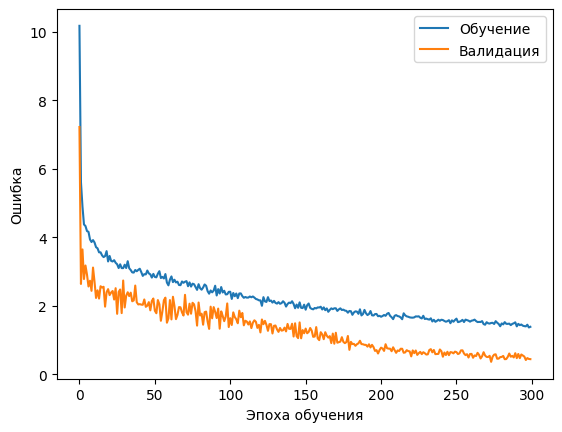

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label = 'Обучение')
plt.plot(history.history['val_mae'], label = 'Валидация')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

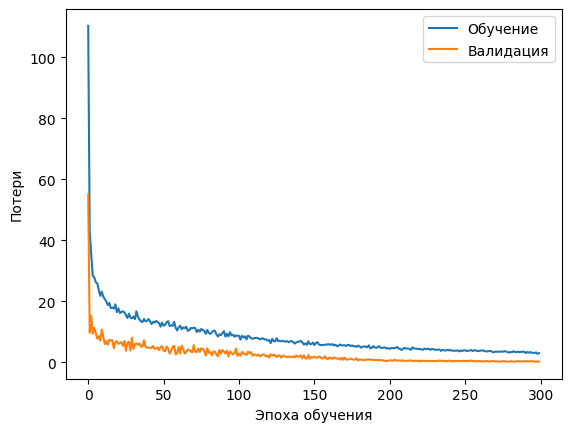

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Обучение')
plt.plot(history.history['val_loss'], label = 'Валидация')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,453 (220.52 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,636 (147.02 KB)

In [ ]:
log_y_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
pred = np.exp(log_y_pred)

In [ ]:
y_test = np.exp(log_y_test)

In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
print("Предсказанная стоимость:", pred[12][0], ", правильная стоимость:", y_test[12])

Предсказанная стоимость: 106504.55 , правильная стоимость: 80999.99999999994


In [ ]:
vec = np.array([])
for i in np.arange(0, len(pred)):
  vec = np.append(vec, pred[i][0])
vec

array([ 98175.734375  , 159718.        ,  94163.5390625 , 101858.078125  ,
       153468.6875    ,  89709.09375   , 119556.1796875 , 103740.1484375 ,
        88385.1796875 ,  95565.703125  ,  96809.75      , 101200.0625    ,
       106504.546875  , 109960.1015625 , 109102.4140625 , 101200.0625    ,
       128592.578125  , 100816.875     ,  92935.9453125 , 127499.2890625 ,
       102680.078125  , 121808.6875    , 116661.1015625 , 101200.0625    ,
       121986.5546875 , 107387.8046875 , 113771.4375    ,  91579.171875  ,
       110170.78125   , 117482.7109375 , 102619.1875    , 160781.96875   ,
       109776.859375  ,  96241.96875   , 137462.46875   , 101495.34375   ,
       101200.0625    , 139106.171875  , 142629.515625  ,  81717.2109375 ,
        95377.234375  , 143486.578125  ,  97546.7109375 , 167385.5625    ,
        98125.3828125 ,  80637.8828125 ,  98944.984375  , 101200.0625    ,
       155364.515625  ,  96112.2734375 , 101136.765625  , 122179.828125  ,
        89197.5       , 1

In [ ]:
diff = np.array([])

for i in np.arange(0, len(y_test)):
    diff = np.append(diff, np.abs(pred[i][0] - y_test[i]))

In [ ]:
for i in np.arange(0, len(y_test)):
    print("Предсказанная стоимость:", pred[i][0], ", правильная стоимость:", y_test[i], 'разница: ', np.abs(pred[i][0] - y_test[i]))

Предсказанная стоимость: 98175.734 , правильная стоимость: 154499.99999999988 разница:  56324.26562499988
Предсказанная стоимость: 159718.0 , правильная стоимость: 324999.9999999999 разница:  165281.99999999988
Предсказанная стоимость: 94163.54 , правильная стоимость: 115000.00000000009 разница:  20836.460937500087
Предсказанная стоимость: 101858.08 , правильная стоимость: 158999.99999999997 разница:  57141.92187499997
Предсказанная стоимость: 153468.69 , правильная стоимость: 315500.00000000006 разница:  162031.31250000006
Предсказанная стоимость: 89709.09 , правильная стоимость: 75500.00000000004 разница:  14209.093749999956
Предсказанная стоимость: 119556.18 , правильная стоимость: 311499.9999999999 разница:  191943.82031249988
Предсказанная стоимость: 103740.15 , правильная стоимость: 145999.99999999994 разница:  42259.85156249994
Предсказанная стоимость: 88385.18 , правильная стоимость: 84500.00000000004 разница:  3885.1796874999563
Предсказанная стоимость: 95565.7 , правильная ст

In [ ]:
СС_tuner = np.corrcoef(vec, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.8616240638381152


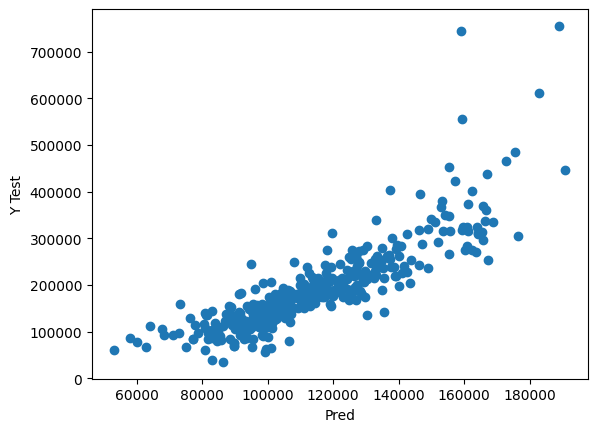

In [ ]:
plt.scatter(pred, y_test)

plt.xlabel('Pred')
plt.ylabel('Y Test')

plt.show()

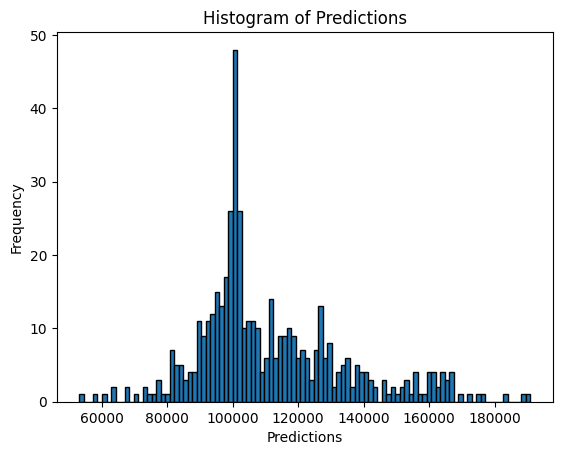

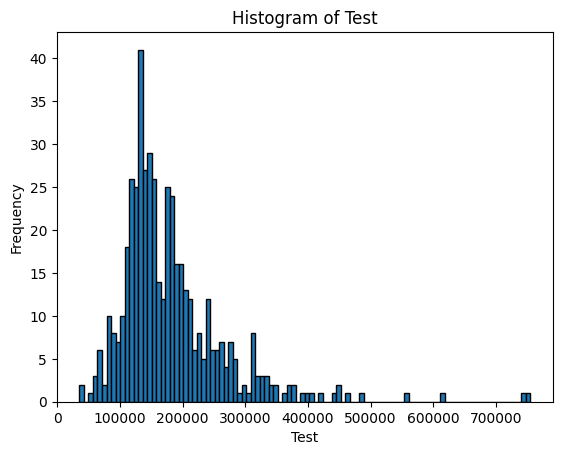

In [ ]:
plt.hist(pred, bins=100, edgecolor='black')

plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions')


plt.show()
################################
plt.hist(y_test, bins=100, edgecolor='black')

plt.xlabel('Test')
plt.ylabel('Frequency')
plt.title('Histogram of Test')


plt.show()